In [1]:
import pandas as pd
import matplotlib.pyplot as plt,matplotlib.image as mpimg
from sklearn.model_selection import train_test_split 
from sklearn import svm 
%matplotlib inline 

In [17]:
'''
loading data 
Here load the 5000 pics
'''
labled_images=pd.read_csv('./input/train.csv')
images=labled_images.iloc[0:5000,1:]
lables=labled_images.iloc[0:5000,:1]
train_images,test_images,train_labels,test_lables=train_test_split(images,lables,test_size=0.2,random_state=0)
#random_state　每次都填1，其他参数一样的情况下你得到的随机数组是一样的。但填0或不填，每次都会不一样

Text(0.5,1,'6')

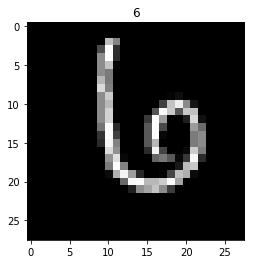

In [25]:
'''
viewing an Img
We reshape back to 28*28
'''
i=1
img=train_images.iloc[i].values #df.loc/iolc的输出常常用于后续的输入,使用.values即可 df.series->np.ndarray
# type(img)
#reshape
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])


(array([682.,   9.,  10.,   7.,  10.,  18.,   7.,  17.,   7.,  17.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

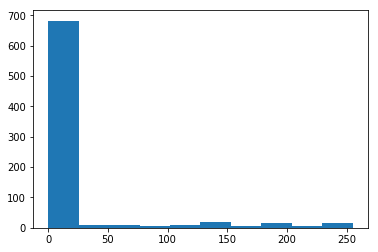

In [29]:
'''
Examining the pixel values
Use hist to show the distribution of values
'''
plt.hist(train_images.iloc[i])

In [43]:
'''
Train model 
'''
clf=svm.SVC()  #use svm classifier
clf.fit(train_images,trian_labels.values.ravel())
clf.score(test_images,test_lables)

SyntaxError: invalid syntax (<ipython-input-43-39bfaf891f32>, line 6)

/home/chanchan/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/chanchan/venv/lib/python3.6/site-packages/pandas/core/frame.py:3163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
/home/chanchan/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

Text(0.5,1,'6')

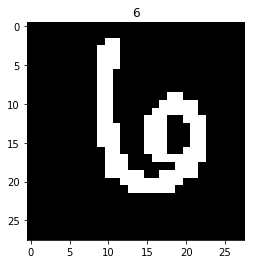

In [52]:
'''
improve:simplify our images
'''
test_images[test_images>0]=1
train_images[train_images>0]=1

img=train_images.iloc[i].values.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(trian_labels.iloc[i,0])

(array([668.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 116.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

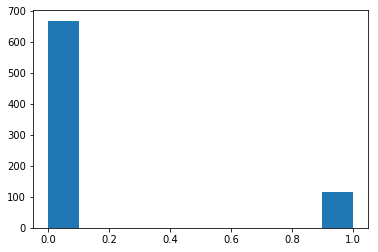

In [53]:
plt.hist(train_images.iloc[i])

In [54]:
'''
Retrainning model 
'''
clf=svm.SVC()
clf.fit(train_images,train_labels.values.ravel())
clf.score(test_images,test_lables)

0.887

In [55]:
'''
Labeling the test data 
'''
test_data=pd.read_csv('./input/test.csv')
test_data[test_data>1]=1
results=clf.predict(test_data[0:5000])

In [56]:
results

array([2, 0, 9, ..., 1, 7, 3])

In [64]:
df=pd.DataFrame(results)

df.index.name='ImageId'
df.index+=1
df.columns=['label']
df.to_csv('results.csv',header=True)